In [17]:
import os, mglearn
import pandas as pd

In [111]:
name1 =['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
                  header = None, index_col = False, names = name1)

In [112]:
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation' , 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [113]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [148]:
data_dummies = pd.get_dummies(data)
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [115]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

In [116]:
X = features.values

In [117]:
y = data_dummies['income_ >50K'].values

In [118]:
X.shape

(32561, 44)

In [119]:
y.shape

(32561,)

In [120]:
# 회귀분석
# 회귀분석은 등간척도이거나 비율척도, 즉, 연속형 특성을 지닐 때만 가능.
# 더미 코딩(원-핫 인코딩)을 통해 변수의 특성을 변경해 주었으므로, 이제 평소랑 같이 선형회귀분석이 가능하다.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8091143594153053

In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [128]:
ct = ColumnTransformer([("scaling", StandardScaler(), ['age', 'hours-per-week']),
                       ("onehot", OneHotEncoder(sparse=False),['workclass', 'education', 'gender', 'occupation'])])

In [129]:
data_features = data.drop("income", axis=1)
data_features[:3]

,age,workclass,education,gender,hours-per-week,occupation
0,39,State-gov,Bachelors,Male,40,Adm-clerical
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial
2,38,Private,HS-grad,Male,40,Handlers-cleaners


In [130]:
data[:3]

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K


In [131]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state = 0)

In [132]:
X_train.shape

(24420, 6)

In [133]:
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_train_trans[:3]

array([[ 1.49894077, -0.44509689,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 2.38045121, -1.66848877,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.

In [134]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_trans, y_train)

LogisticRegression(max_iter=1000)

In [135]:
X_test_trans = ct.transform(X_test)

In [136]:
lr.score(X_test_trans, y_test)

0.808991524382754

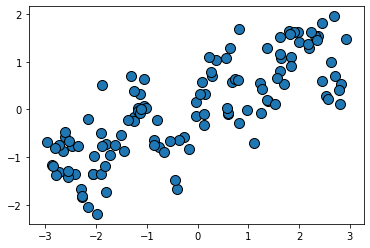

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1, 1)

mglearn.discrete_scatter(X, y);

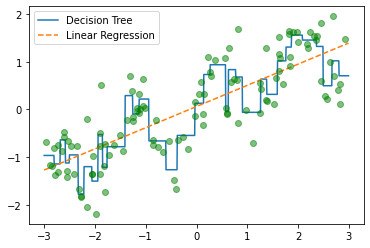

In [138]:
dtr= DecisionTreeRegressor(min_samples_leaf = 3).fit(X, y)
plt.plot(line, dtr.predict(line), label = "Decision Tree")
lr = LinearRegression().fit(X, y)
plt.plot(line, lr.predict(line), '--', label = 'Linear Regression')
plt.legend()
plt.plot(X[:, 0], y, 'o', alpha = 0.5, c = 'g')
plt.show()

In [139]:
from sklearn.preprocessing import KBinsDiscretizer

In [140]:
kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform')
kb.fit(X)
kb.bin_edges_        # X의 구간을 나눠주세요

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
              -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
               2.92132162])                                                   ],
      dtype=object)

In [141]:
X_binned = kb.transform(X)
print(X[:10])
print(X_binned.toarray()[:10])  # 각 데이터 좌표로 데이터가 어느 bin에 위치하는지 알 수 있음.

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [142]:
kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

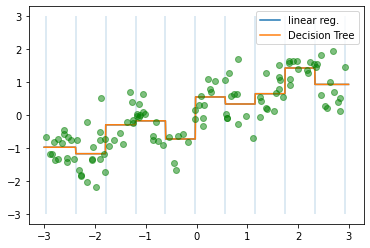

In [146]:
line_binned = kb.transform(line)
lr = LinearRegression().fit(X_binned, y)
plt.plot(line, lr.predict(line_binned), label = "linear reg.")

dtr= DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, dtr.predict(line_binned), label = "Decision Tree")

plt.plot(X[:, 0], y, 'o', alpha = 0.5, c = 'g')
plt.vlines(kb.bin_edges_[0], -3, 3, alpha = 0.2)
plt.legend()
plt.show()